# **Importano as  Bibliotecas Necessárias**

In [3]:
#!pip install --upgrade scikeras
#!pip install keras-tuner --upgrade
#!install --upgrade scikeras
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# Importando as bibliotecas necessárias
import random
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler # Para normalizar os dados
from sklearn.metrics import mean_squared_error, mean_absolute_error # Para calcular as métricas
import matplotlib.pyplot as plt # Para plotar os gráficos

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from tensorflow.keras import regularizers


# **PROBLEMA 1**

# *Importando os Dados*

In [29]:
# Cria uma lista com os nomes das colunas
cols = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8","Y"]
# Imprimir a lista
# Imprimir a lista
len(cols)

9

In [30]:
path = 'https://raw.githubusercontent.com/Alisson-Ursulino-git/Machine_Learning/main/Dados_das_Listas/Lista_04/concrete.csv'
DataFrame = pd.read_csv(path, names=cols)
DataFrame

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


# *Análise dos Dados*

In [31]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1030 non-null   float64
 1   X2      1030 non-null   float64
 2   X3      1030 non-null   float64
 3   X4      1030 non-null   float64
 4   X5      1030 non-null   float64
 5   X6      1030 non-null   float64
 6   X7      1030 non-null   float64
 7   X8      1030 non-null   float64
 8   Y       1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [32]:
DataFrame.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [33]:
count_zeros = (DataFrame == 0.0).sum()
print(count_zeros)

X1      0
X2    471
X3    566
X4      0
X5    379
X6      0
X7      0
X8      0
Y       0
dtype: int64


In [34]:
# Usando um loop for para iterar sobre as colunas
df = DataFrame.copy()
colunas = df.columns.values
media_col = []
desvio_col = []
for coluna in colunas:
   # Calculando a média e o desvio padrão da coluna sem os valores 0.0 
   media_col.append( df[coluna].replace(0.0, np.nan).mean() )
   desvio_col.append( df[coluna].replace(0.0, np.nan).std() )

# Calculando a média e o desvio padrão da coluna sem os valores 0.0
def gerar_aleatorio_normal(valor, media=0.0,desvio=1.0): 
  if valor == 0.0:
     return random.normalvariate(media, desvio) 
  else: 
    return valor
    
# Iterando sobre todas as colunas
for i in range(len(colunas)):
  df[colunas[i]] = df[colunas[i]].apply(gerar_aleatorio_normal, args=(media_col[i], desvio_col[i]))

In [35]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,540.0,127.484882,117.214096,162.0,2.500000,1040.0,676.0,28.0,79.99
1,540.0,144.769636,89.124690,162.0,2.500000,1055.0,676.0,28.0,61.89
2,332.5,142.500000,80.040485,228.0,15.130189,932.0,594.0,270.0,40.27
3,332.5,142.500000,124.738202,228.0,12.661274,932.0,594.0,365.0,41.05
4,198.6,132.400000,192.967621,192.0,3.427175,978.4,825.5,360.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,28.0,44.28
1026,322.2,68.410616,115.600000,196.0,10.400000,817.9,813.4,28.0,31.18
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,28.0,23.70
1028,159.1,186.700000,100.343351,175.6,11.300000,989.6,788.9,28.0,32.77


# *Constrói o Modelo MLP e Ajusta os Hiperparâmetros*

In [56]:

# Função para criar o modelo MLP com os hiperparâmetros fornecidos
def create_mlp(neurons, activation, reg=1e-2,  optimizer='SGD'):
    model = Sequential()
    model.add(Dense( neurons, activation=activation, 
                    input_dim=X_train.shape[1], 
                    kernel_regularizer = regularizers.l2(reg) ) ) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


# Justando os hiperparâmetros
# alpha = [ regularizers.l2(1e-4), regularizers.l2(1e-3), 
#                                         regularizers.l2(1e-2), regularizers.l2(1e-1), 
#                                         regularizers.l2(1), regularizers.l2(10)]
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
batch_size = [16, 32, 64]
learn_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
neurons= [n for n in range(1, 200,9)]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
activation = ['softmax', 'softplus', 'softsign', 'relu',
              'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(#reg=alpha,
                  batch_size=batch_size,
                  optimizer__learning_rate=learn_rate, 
                  model__neurons=neurons,
                  optimizer__momentum=momentum,
                  model__activation=activation)
# Separando as variáveis preditoras (X) e a variável resposta (Y)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# Dividindo os dados em conjuntos de treino, validação e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 20% para teste
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) # 25% de 80% para validação

# Normalizando os dados de X usando a média e o desvio padrão
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Calcula a média e o desvio padrão e aplica a transformação nos dados de treino
X_val = scaler.transform(X_val) # Aplica a mesma transformação nos dados de validação
X_test = scaler.transform(X_test) # Aplica a mesma transformação nos dados de teste

# Criando o modelo de KerasRegressor
mlp = KerasRegressor(model=create_mlp, verbose=0)

# Criando o objeto de random search com 10 iterações e validação cruzada com os dados de validação
rs = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, n_iter=10, 
                        cv=[(np.arange(len(X_train)), np.arange(len(X_val)))], 
                        random_state=42)
epochs = int(5e2)
# Criando o callback de early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
rs.fit(X_train, Y_train,epochs=epochs, callbacks=[es])
# Obtendo o melhor modelo encontrado pelo random search
best_mlp = rs.best_estimator_

In [57]:
# Exibindo os melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros:')
print(rs.best_params_)

Melhores hiperparâmetros:
{'optimizer__momentum': 0.4, 'optimizer__learning_rate': 0.0001, 'model__neurons': 73, 'model__activation': 'tanh', 'batch_size': 64}


# *Métricas dos Conjuntos de Treino, Validação e Teste*

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Função para calcular o erro relativo médio
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Exibindo os melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros:')
print(rs.best_params_)

# Exibindo o melhor score de validação cruzada
print('\nMelhor score de validação cruzada:')
print(rs.best_score_)

# Avaliando o modelo nos dados de teste
print('\nScore nos dados de teste:')
print(rs.score(X_test, Y_test))
# ___________________________________________________________________________________________________
# Avaliando o modelo nos dados de teste
y_train_pred = best_mlp.predict(X_train)
y_val_pred = best_mlp.predict(X_val)
y_test_pred = best_mlp.predict(X_test)

# Calculando as métricas RMSE, MAE e MRE nos conjuntos de treino, validação e teste
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
mae_train = mean_absolute_error(Y_train, y_train_pred)
mre_train = mean_relative_error(Y_train, y_train_pred)

rmse_val = np.sqrt(mean_squared_error(Y_val, y_val_pred))
mae_val = mean_absolute_error(Y_val, y_val_pred)
mre_val = mean_relative_error(Y_val, y_val_pred)

rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
mae_test = mean_absolute_error(Y_test, y_test_pred)
mre_test = mean_relative_error(Y_test, y_test_pred)

# Exibindo as métricas
print('\n')
print('Métricas no conjunto de treino:')
print('RMSE:', rmse_train)
print('MAE:', mae_train)
print('MRE:', mre_train)
print('\n')
print('Métricas no conjunto de validação:')
print('RMSE:', rmse_val)
print('MAE:', mae_val)
print('MRE:', mre_val)
print('\n')
print('Métricas no conjunto de teste:')
print('RMSE:', rmse_test)
print('MAE:', mae_test)
print('MRE:', mre_test)

Melhores hiperparâmetros:
{'optimizer__momentum': 0.4, 'optimizer__learning_rate': 0.0001, 'model__neurons': 73, 'model__activation': 'tanh', 'batch_size': 64}

Melhor score de validação cruzada:
0.9390789553226153

Score nos dados de teste:
0.6471547724877835


Métricas no conjunto de treino:
RMSE: 0.9654388572733459
MAE: 0.7462370552197851
MRE: inf


Métricas no conjunto de validação:
RMSE: 1.914856358732707
MAE: 1.3328144303475968
MRE: inf


Métricas no conjunto de teste:
RMSE: 1.7895127122025838
MAE: 1.305697081064937
MRE: inf


# *Gráfico da Função Custo*

In [61]:
# Criando o callback de early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = best_mlp.model_.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                              epochs=int(1e3),verbose=0, callbacks=[es] )

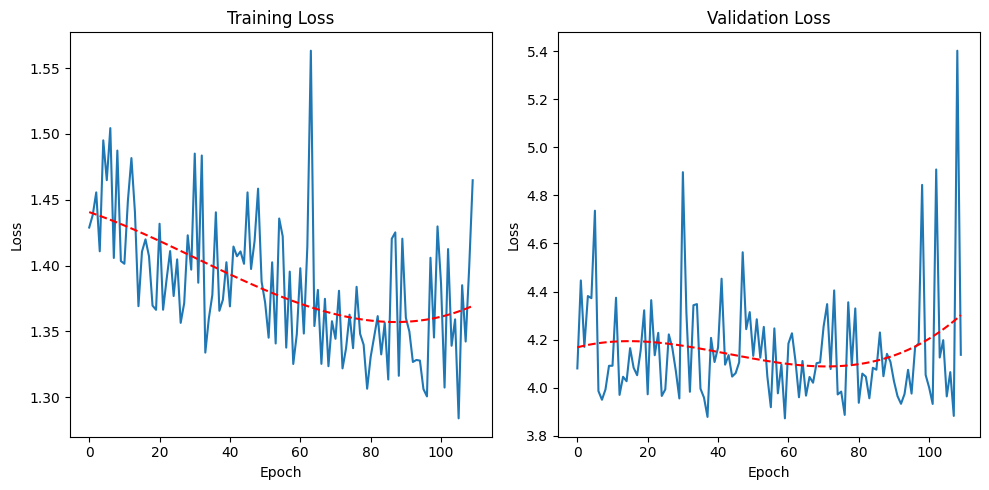

In [62]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Ajustando um polinômio de grau 3 aos dados da função de custo no conjunto de treinamento
x = np.arange(len(history.history['loss']))
coefficients = np.polyfit(x, history.history['loss'], 3)
polynomial = np.poly1d(coefficients)
y = polynomial(x)

# Plotando a curva da função custo no conjunto de treinamento
axs[0].plot(history.history['loss'])
axs[0].set_title('Training Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')

# Traçando a curva ajustada no gráfico do conjunto de treinamento
axs[0].plot(x, y, color='r', linestyle='--')

# Ajustando um polinômio de grau 3 aos dados da função de custo no conjunto de validação
x = np.arange(len(history.history['val_loss']))
coefficients = np.polyfit(x, history.history['val_loss'], 3)
polynomial = np.poly1d(coefficients)
y = polynomial(x)

# Plotando a curva da função custo no conjunto de validação
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')

# Traçando a curva ajustada no gráfico do conjunto de validação
axs[1].plot(x, y, color='r', linestyle='--')

plt.tight_layout()
plt.show()


# **PROBLEMA 2**

# *Importando os dados*

In [46]:
# Cria uma lista com os nomes das colunas
cols = [f'X{i}' for i in range(1, 10)] + ['Y']
# Imprimir a lista
print(cols)
len(cols)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y']


10

In [47]:
path = 'https://raw.githubusercontent.com/Alisson-Ursulino-git/Machine_Learning/main/Dados_das_Listas/Lista_04/vowel.csv'
DataFrame = pd.read_csv(path, names=cols)
DataFrame

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,8.0
-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,2.0
-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,1.0
-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,0.0
-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,5.0
...,...,...,...,...,...,...,...,...,...,...
-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,3.0
-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,9.0
-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,4.0
-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,10.0


# *Análise dos Dados*

In [48]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 990 entries, -3.639 to -3.291
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      990 non-null    float64
 1   X2      990 non-null    float64
 2   X3      990 non-null    float64
 3   X4      990 non-null    float64
 4   X5      990 non-null    float64
 5   X6      990 non-null    float64
 6   X7      990 non-null    float64
 7   X8      990 non-null    float64
 8   X9      990 non-null    float64
 9   Y       990 non-null    float64
dtypes: float64(10)
memory usage: 85.1 KB


In [49]:
DataFrame.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
Y     0
dtype: int64

In [50]:
DataFrame.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,1.881764,-0.507770,0.515483,-0.305658,0.630244,-0.004365,0.336553,-0.302976,-0.071339,5.000000
std,1.175272,0.711948,0.759261,0.664602,0.603871,0.461927,0.573302,0.570162,0.603985,3.163876
min,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000,0.000000
25%,1.051500,-0.975750,-0.065500,-0.769000,0.196000,-0.307000,-0.095750,-0.704000,-0.548000,2.000000
50%,1.876500,-0.572500,0.433500,-0.299000,0.552000,0.022000,0.328000,-0.302500,-0.156500,5.000000
75%,2.738000,-0.068750,1.096000,0.169500,1.028500,0.296500,0.770000,0.093750,0.371000,8.000000
max,5.074000,1.431000,2.377000,1.831000,2.327000,1.403000,2.039000,1.309000,1.396000,10.000000


In [51]:
df = DataFrame.copy()
df['Y'] = df['Y'].astype(int)
df[['Y']]

,Y
-3.639,8
-3.327,2
-2.120,1
-2.287,0
-2.598,5
...,...
-3.239,3
-3.753,9
-3.980,4
-4.264,10


# *Constrói o Modelo MLP e Ajusta os Hiperparâmetros*

In [52]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
# Função para criar o modelo MLP com os hiperparâmetros fornecidos
def create_mlp(neurons, activation, reg=1e-2,  optimizer='SGD'):
    model = Sequential()
    model.add(Dense( neurons, activation=activation, 
                    input_dim=X_train.shape[1], 
                    kernel_regularizer = regularizers.l2(reg) ) ) 
    model.add(Dense(11,activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


# Justando os hiperparâmetros
# alpha = [ regularizers.l2(1e-4), regularizers.l2(1e-3), 
#                                         regularizers.l2(1e-2), regularizers.l2(1e-1), 
#                                         regularizers.l2(1), regularizers.l2(10)]
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
batch_size = [16, 32, 64]
learn_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
neurons= [n for n in range(1, 200,9)]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
activation = ['softmax', 'softplus', 'softsign', 'relu',
              'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(#reg=alpha,
                  batch_size=batch_size,
                  optimizer__learning_rate=learn_rate, 
                  model__neurons=neurons,
                  optimizer__momentum=momentum,
                  model__activation=activation)
# Separando as variáveis preditoras (X) e a variável resposta (Y)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
# Codificando os rótulos das classes usando a codificação one-hot
Y = to_categorical(Y)
# Dividindo os dados em conjuntos de treino, validação e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 20% para teste
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) # 25% de 80% para validação

# Normalizando os dados de X usando a média e o desvio padrão
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Calcula a média e o desvio padrão e aplica a transformação nos dados de treino
X_val = scaler.transform(X_val) # Aplica a mesma transformação nos dados de validação
X_test = scaler.transform(X_test) # Aplica a mesma transformação nos dados de teste

# Criando o modelo de KerasRegressor
mlp = KerasClassifier(model=create_mlp, verbose=0)

# Criando o objeto de random search com 10 iterações e validação cruzada com os dados de validação
rs = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, n_iter=10, 
                        cv=[(np.arange(len(X_train)), np.arange(len(X_val)))], 
                        random_state=42)
epochs = int(1e3)
# Criando o callback de early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
rs.fit(X_train, Y_train,epochs=epochs, callbacks=[es])
# Obtendo o melhor modelo encontrado pelo random search
best_mlp = rs.best_estimator_

# *Métricas dos Conjuntos de Treino, Validação e Teste*

In [53]:
from sklearn.metrics import accuracy_score

# Previsões nos dados de treino
y_pred_train = best_mlp.predict(X_train)
# Previsões nos dados de validação
y_pred_val = best_mlp.predict(X_val)
# Previsões nos dados de teste
y_pred_test = best_mlp.predict(X_test)

# Calculando a acurácia para o conjunto de treino
accuracy_train = accuracy_score(Y_train, y_pred_train)
# Calculando a acurácia para o conjunto de teste
accuracy_val = accuracy_score(Y_val, y_pred_val)
# Calculando a acurácia para o conjunto de teste
accuracy_test = accuracy_score(Y_test, y_pred_test)

print('Acurácia no conjunto de treino:', accuracy_train)
print('Acurácia no conjunto de validação:', accuracy_val)
print('Acurácia no conjunto de teste:', accuracy_test)


Acurácia no conjunto de treino: 0.7171717171717171
Acurácia no conjunto de validação: 0.6616161616161617
Acurácia no conjunto de teste: 0.5858585858585859


# *Gráfico da Função Custo*

In [54]:
# Criando o callback de early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history = best_mlp.model_.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                              epochs=int(1e3),verbose=0, callbacks=[es] )

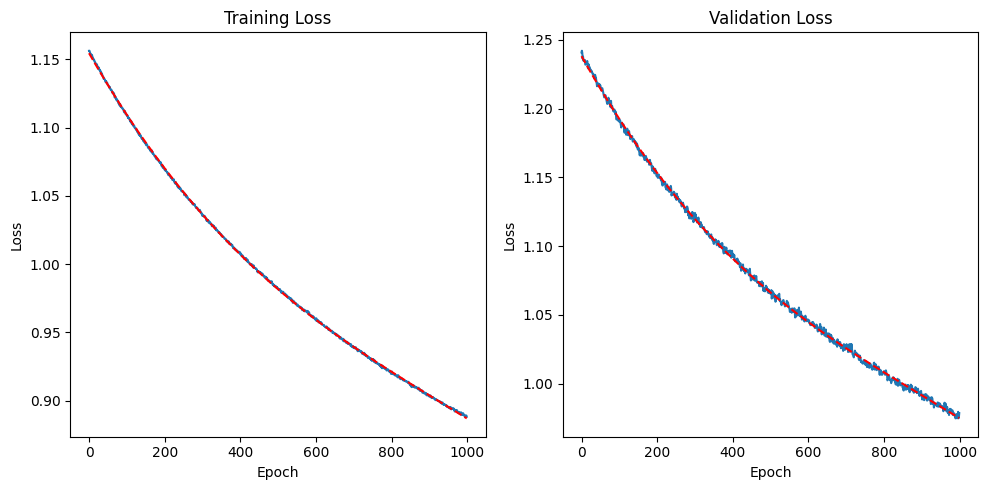

In [55]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Ajustando um polinômio de grau 3 aos dados da função de custo no conjunto de treinamento
x = np.arange(len(history.history['loss']))
coefficients = np.polyfit(x, history.history['loss'], 3)
polynomial = np.poly1d(coefficients)
y = polynomial(x)

# Plotando a curva da função custo no conjunto de treinamento
axs[0].plot(history.history['loss'])
axs[0].set_title('Training Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')

# Traçando a curva ajustada no gráfico do conjunto de treinamento
axs[0].plot(x, y, color='r', linestyle='--')

# Ajustando um polinômio de grau 3 aos dados da função de custo no conjunto de validação
x = np.arange(len(history.history['val_loss']))
coefficients = np.polyfit(x, history.history['val_loss'], 3)
polynomial = np.poly1d(coefficients)
y = polynomial(x)

# Plotando a curva da função custo no conjunto de validação
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')

# Traçando a curva ajustada no gráfico do conjunto de validação
axs[1].plot(x, y, color='r', linestyle='--')

plt.tight_layout()
plt.show()
